Decision Tree Accuracy: 0.9853658536585366


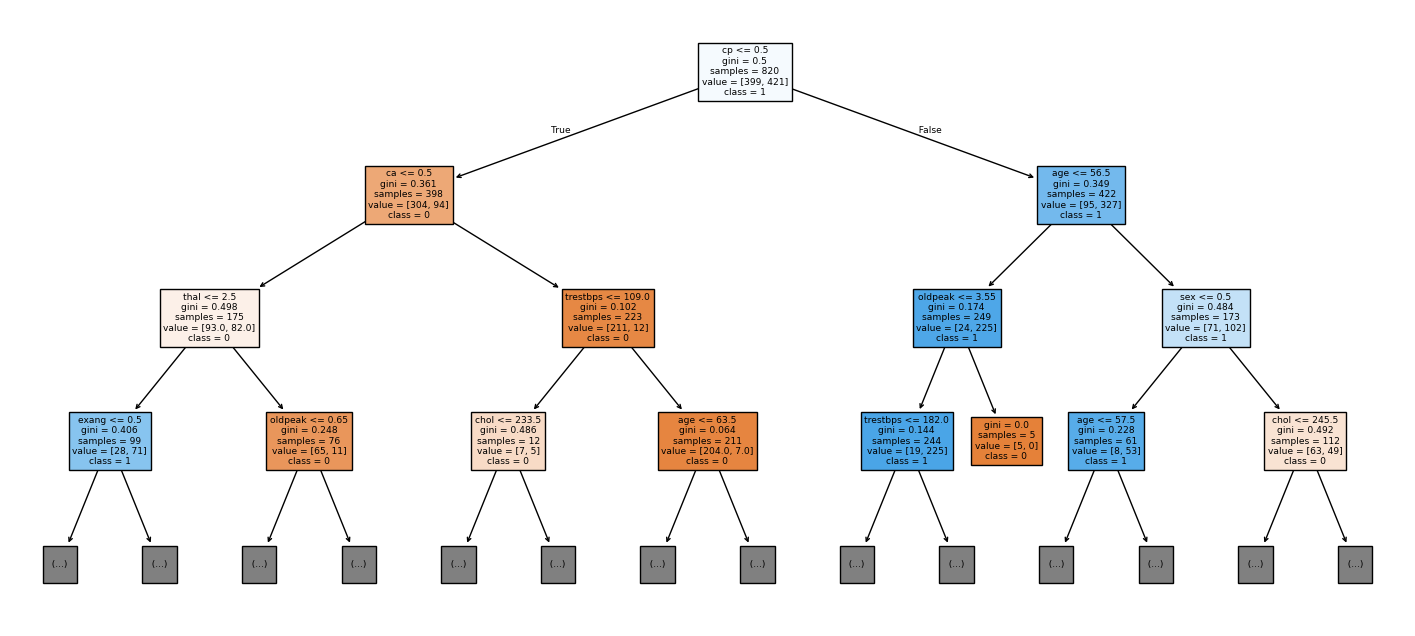

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv("heart.csv")

X = df.drop(columns=['target'])
y = df['target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predictions & accuracy
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

# Visualize tree (limit depth for readability)
plt.figure(figsize=(18,8))
plot_tree(dt, feature_names=X.columns, class_names=['0', '1'], filled=True, max_depth=3)
plt.show()




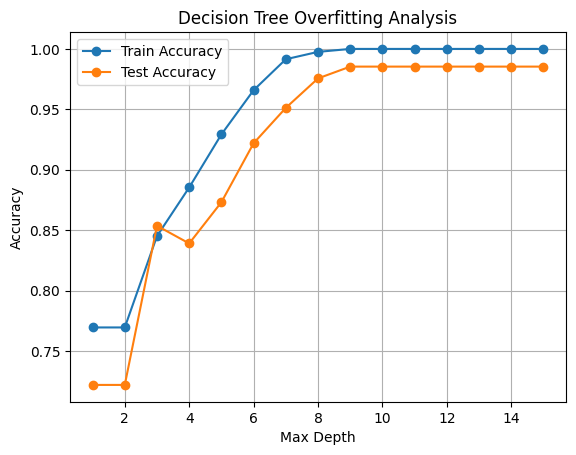

In [2]:
import matplotlib.pyplot as plt

depths = range(1, 16)
train_scores, test_scores = [], []

for d in depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))

plt.plot(depths, train_scores, marker='o', label='Train Accuracy')
plt.plot(depths, test_scores, marker='o', label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Overfitting Analysis')
plt.legend()
plt.grid(True)
plt.show()


Random Forest Accuracy: 1.0


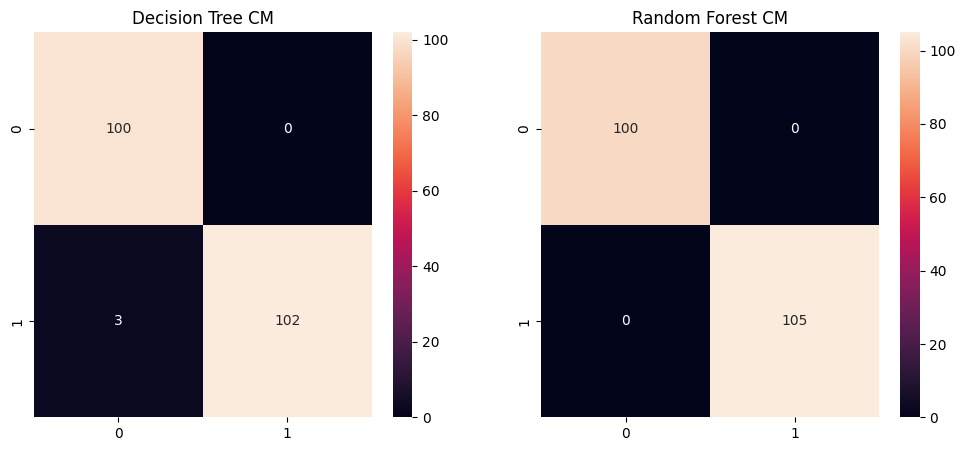

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# Confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', ax=axes[0])
axes[0].set_title('Decision Tree CM')
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', ax=axes[1])
axes[1].set_title('Random Forest CM')
plt.show()


Decision Tree Feature Importances:


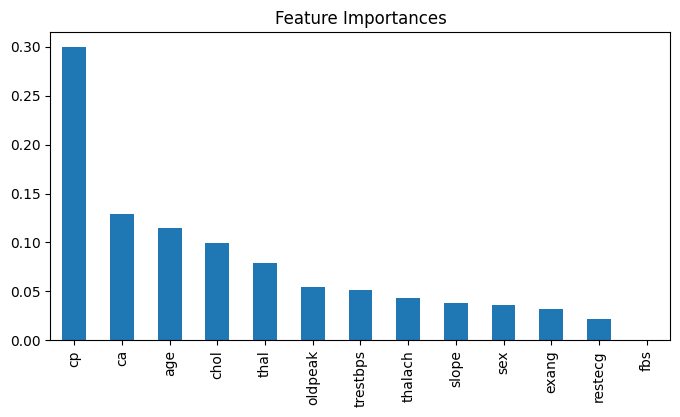

Random Forest Feature Importances:


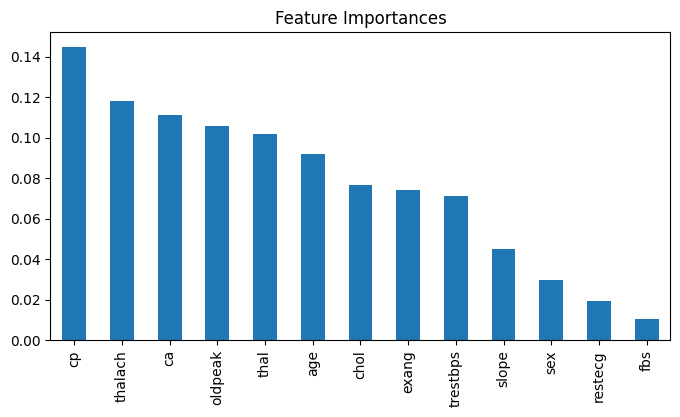

,0
cp,0.144796
thalach,0.118097
ca,0.110965
oldpeak,0.105590
thal,0.101825
age,0.091826
chol,0.076579
exang,0.074189
trestbps,0.071178
slope,0.045234


In [4]:
import pandas as pd

def plot_feature_importances(model, X):
    feat_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
    feat_imp.plot(kind='bar', figsize=(8,4), title='Feature Importances')
    plt.show()
    return feat_imp

print("Decision Tree Feature Importances:")
plot_feature_importances(dt, X)

print("Random Forest Feature Importances:")
plot_feature_importances(rf, X)


In [5]:
from sklearn.model_selection import StratifiedKFold, cross_validate

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['accuracy', 'precision', 'recall', 'f1']

print("Cross-validation - Decision Tree")
cv_res_dt = cross_validate(dt, X, y, cv=cv, scoring=scoring)
for s in scoring:
    print(f"{s}: mean={cv_res_dt['test_'+s].mean():.3f} std={cv_res_dt['test_'+s].std():.3f}")

print("\nCross-validation - Random Forest")
cv_res_rf = cross_validate(rf, X, y, cv=cv, scoring=scoring)
for s in scoring:
    print(f"{s}: mean={cv_res_rf['test_'+s].mean():.3f} std={cv_res_rf['test_'+s].std():.3f}")


Cross-validation - Decision Tree
accuracy: mean=1.000 std=0.000
precision: mean=1.000 std=0.000
recall: mean=1.000 std=0.000
f1: mean=1.000 std=0.000

Cross-validation - Random Forest
accuracy: mean=0.996 std=0.008
precision: mean=1.000 std=0.000
recall: mean=0.992 std=0.015
f1: mean=0.996 std=0.008
